Seconds with 20 frames: 1342
Seconds with 19 frames: 446
Seconds with neither 20 nor 19 frames: 12


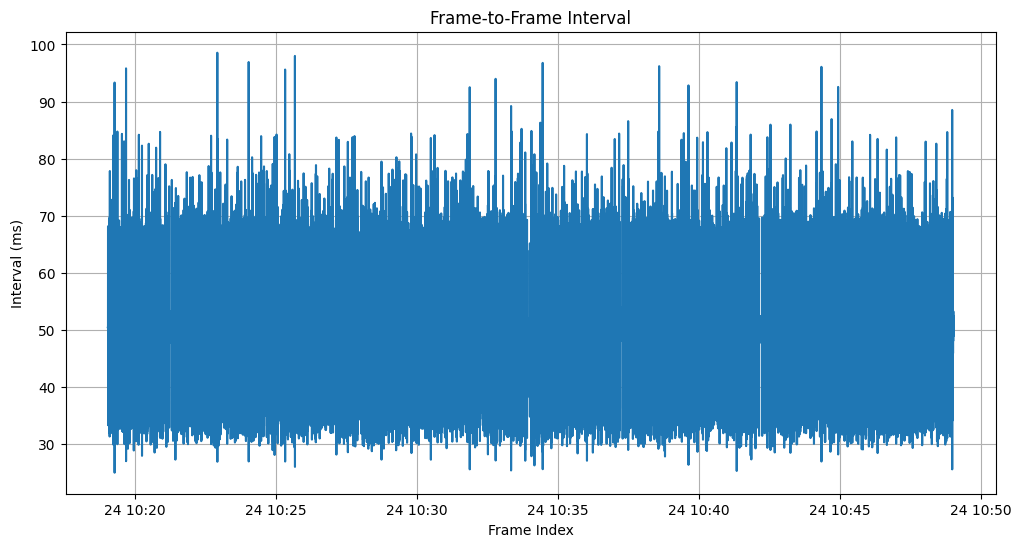

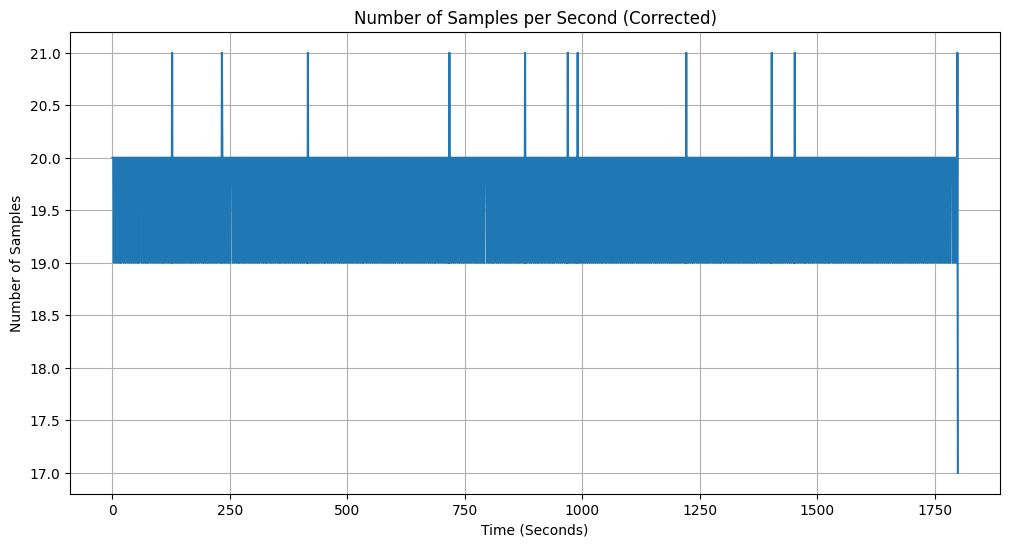

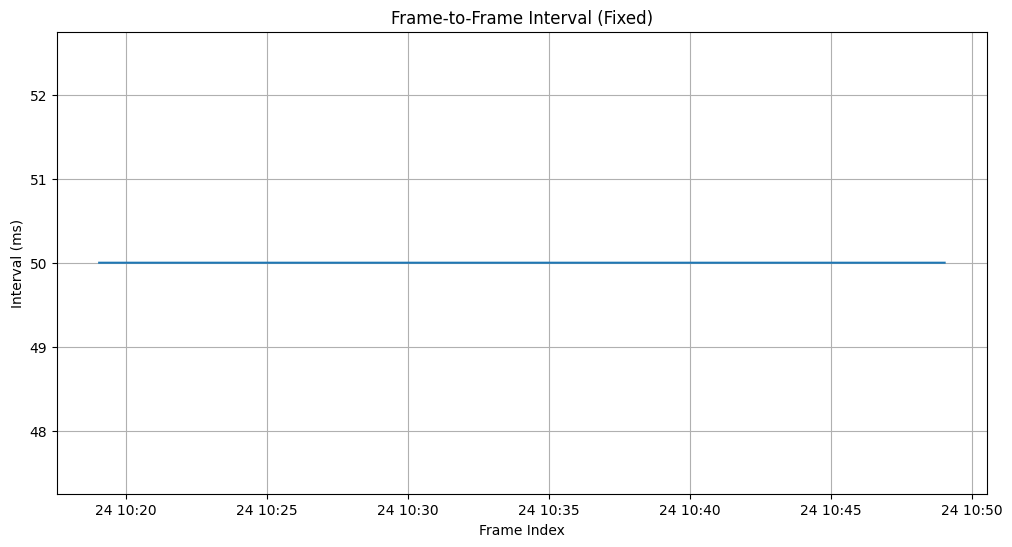

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'S:/Jun/minicam-frame-gate_2024-05-24T10_18_28.csv'
data = pd.read_csv(file_path)

# Convert the first column to datetime
data['Timestamp'] = pd.to_datetime(data.iloc[:, 0])

# Set the timestamp as the index
data.set_index('Timestamp', inplace=True)

# Extract the first timestamp
first_timestamp = data.index[0]

# Calculate the time delta in seconds for each timestamp
data['Time_Seconds'] = (data.index - first_timestamp).total_seconds()

# Count the number of samples per second
sample_counts_per_second = data['Time_Seconds'].astype(int).value_counts()

# Count the number of seconds with 20 frames and 19 frames
seconds_with_20_frames = sample_counts_per_second[sample_counts_per_second == 20].count()
seconds_with_19_frames = sample_counts_per_second[sample_counts_per_second == 19].count()
seconds_with_other_frame_counts = sample_counts_per_second[
    (sample_counts_per_second != 20) & (sample_counts_per_second != 19)
].count()

print(f"Seconds with 20 frames: {seconds_with_20_frames}")
print(f"Seconds with 19 frames: {seconds_with_19_frames}")
print(f"Seconds with neither 20 nor 19 frames: {seconds_with_other_frame_counts}")

# Plot the original frame-to-frame intervals
frame_intervals = data.index.to_series().diff().dropna().dt.total_seconds() * 1000

plt.figure(figsize=(12, 6))
plt.plot(frame_intervals.index, frame_intervals.values)
plt.xlabel('Frame Index')
plt.ylabel('Interval (ms)')
plt.title('Frame-to-Frame Interval')
plt.grid(True)
plt.show()

# Define the desired frequency (20 samples per second)
desired_frequency = '50L'  # 50 milliseconds

# Create a new time index with the desired frequency
time_index = pd.date_range(start=data.index[0], end=data.index[-1], freq=desired_frequency)

# Reindex the original data to the new time index and interpolate missing values
resampled_data = data.reindex(time_index).interpolate(method='time')

# Ensure correct data format after interpolation
resampled_data['Time_Seconds'] = (resampled_data.index - resampled_data.index[0]).total_seconds()

# Resample the data to count the number of samples per second
sample_counts_per_second_corrected = data['Time_Seconds'].astype(int).value_counts().sort_index()


# Plot the sample counts
plt.figure(figsize=(12, 6))
plt.plot(sample_counts_per_second_corrected.index, sample_counts_per_second_corrected.values)
plt.xlabel('Time (Seconds)')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Second (Corrected)')
plt.grid(True)
plt.show()

# Calculate the total duration in seconds
total_duration_seconds = data['Time_Seconds'].max()

total_duration_seconds


# Plot the new frame-to-frame intervals
frame_intervals_fixed = resampled_data.index.to_series().diff().dropna().dt.total_seconds() * 1000

plt.figure(figsize=(12, 6))
plt.plot(frame_intervals_fixed.index, frame_intervals_fixed.values)
plt.xlabel('Frame Index')
plt.ylabel('Interval (ms)')
plt.title('Frame-to-Frame Interval (Fixed)')
plt.grid(True)
plt.show()
